In [23]:
import numpy as np 
import matplotlib.pyplot as plt

In [24]:
data_count = 500
# random data from 1000 to 3000 (the area of the house in feet^2)
x_train = np.random.rand(data_count) * 2000 + 1000   
# generate an array with data_count length with random values from 230 to 300
# these coficcients will be used to generate y_train 
coficcients = np.random.rand(data_count) * 70 + 230  
# generate y_train (the price of the house in $)
y_train = x_train * coficcients  
print(y_train[0:10])      

[262880.94931698 255199.92690646 723238.60873464 648898.17118708
 711497.22361042 640986.4024798  639242.47908595 761369.58978724
 561510.75682344 766297.55802412]


In [25]:
# normalize data
# subtract the mean and divide by the standard deviation
original_x_train = x_train
original_y_train = y_train
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)
print(y_train[0:10])

[-1.69962551 -1.74747492  1.16820109  0.70509273  1.09505741  0.65580587
  0.64494199  1.40574041  0.16070741  1.43643949]


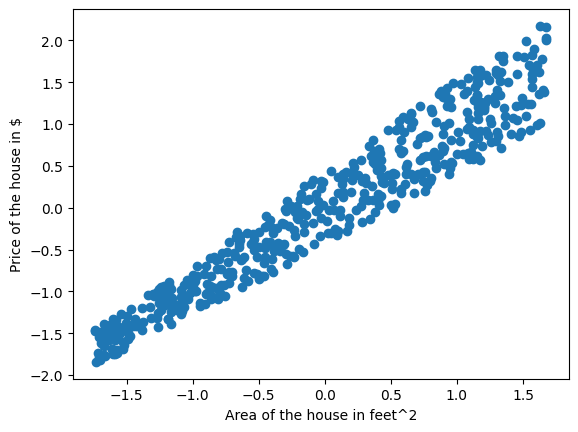

In [26]:
# plot the data
plt.scatter(x_train, y_train)
plt.xlabel('Area of the house in feet^2')
plt.ylabel('Price of the house in $')
plt.show()

In [27]:
def compute_cost(x,y,t0,t1):
    return np.sum((t0 + t1*x - y)**2) / (2*len(x))

In [28]:
# give an initial value to theta0 and theta1
theta0 = np.random.rand() 
theta1 = np.random.rand() 
print(theta0, theta1)

0.5350536622410694 0.1292816701598245


In [29]:
def gradient(t0, t1, x, y, alpha=0.25, iterations=1000, plot=False):
    costs = []
    while (compute_cost(x,y,t0,t1) > 0.01 and iterations > 0):
        t0 = t0 - alpha * np.sum(t0 + t1*x - y) / len(x)
        t1 = t1 - alpha * np.sum((t0 + t1*x - y)*x) / len(x)
        costs.append(compute_cost(x,y,t0,t1))
        iterations -= 1

    if plot:
        iters = np.arange(0, len(costs))
        plt.plot(iters, costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()           


    return t0, t1

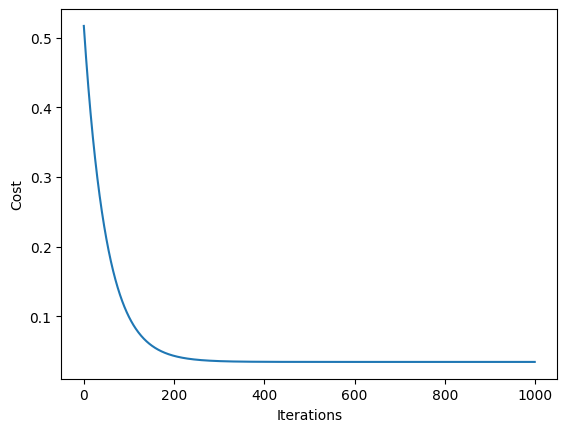

2.3098934030542714e-05 0.9647846593050078


In [30]:
theta0, theta1 = gradient(theta0, theta1, x_train, y_train, 0.01, 1000, True)
print(theta0, theta1)

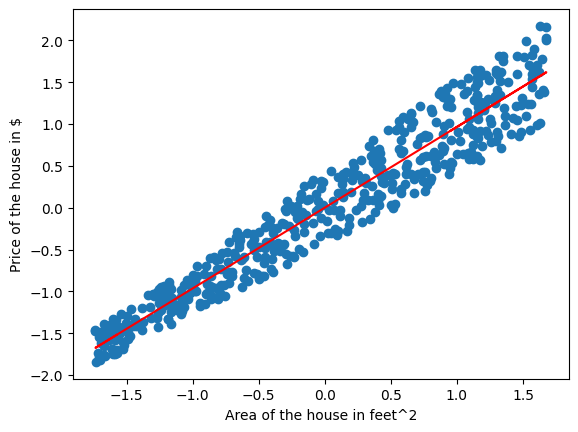

[-1.52083777 -1.53086074  1.16642386  0.39522237  1.3131335   1.04870115
  0.96223326  1.59404061  0.38540473  1.09446728]


In [31]:

y_test = theta0 + theta1*x_train
plt.scatter(x_train, y_train)
plt.plot(x_train, y_test, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()
print(y_test[0:10])

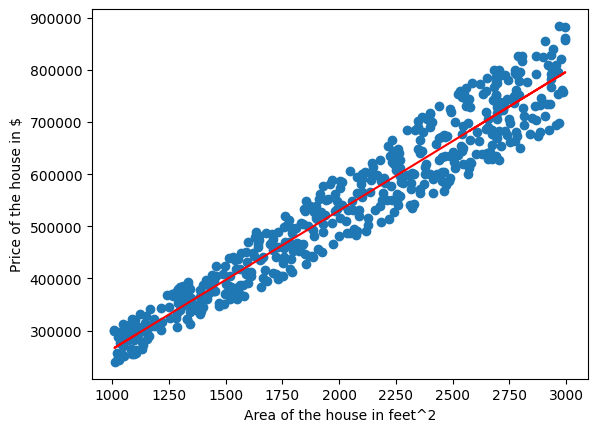

In [32]:
# get the original data
original_y_test= y_test * np.std(original_y_train) + np.mean(original_y_train)
# plot the original data
plt.scatter(original_x_train, original_y_train)
plt.plot(original_x_train, original_y_test, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()


In [33]:
# check the accuracy of the model
# this broken fix it
def r2_score(y, y_pred):
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

score = r2_score(original_y_train, original_y_test)
if(score > 0.9):
    print("The model is accurate with a score of", round(score, 5))
else:
    print("The model is not accurate with a score of", round(score, 5))

The model is accurate with a score of 0.93088
